# Deep Learning Tutorial

This notebook incorporates, analyses, experiments with and comments on the neural network and deep learning tutorial contained in [NeuralNetworksAndDeepLearning.com](http://neuralnetworksanddeeplearning.com/chap1.html#exercises_191892)

In [1]:
#### Libraries
# Standard library
import random

# Third-party libraries
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Loader
import mnist_loader

## Perceptron/Sigmoid Neuron

We begin with the input layer consisting of a vectorised set of inputs $x_i$. For instance, in the MNIST example, if each image (of a digit character) is described by a grid of 28 X 28 pixels where the intensity at each pixel is a grayscale value from 0.0 to 1.0, the input is then a 28 X 28 = 784 length vector where each component ranges from 0.0 to 1.0

A single *perceptron* neuron consists of a linear combination of inputs $\sum_j w_j x_j$ and a threshold function that outputs a 1 if the linear combination exceeds the threshold $b$. In other words, in vector form:

\begin{align}
\text{output} &= \left\{
\begin{array}{ll}
0 \text{  if  } \sum_j w_j x_j \leq -b \\
1 \text{  if  }  \sum_j w_j x_j > -b
\end{array}
\right.
\end{align}

The sigmoid neuron is an additional nonlinear transformation that is applied to the affine transformations above, where typically it is defined as:

\begin{align}
\sigma(z) & \equiv \frac{1}{1 + e\,^{-z}} \\
&= \frac{1}{1 + \exp\left(-\sum_j w_j x_j - b \right)} \\
\end{align}

The sigmoid function has the form shown below:

In [2]:
z = np.arange(-5,5,0.1)
sigma = 1 / (1+np.exp(-z))


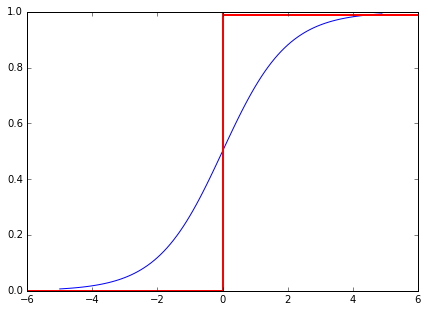

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(z,sigma)
plt.plot([0,0], [0.0, 1.0], color='r', linestyle='-', linewidth=2)
plt.plot([-6,0], [0.001, 0.001], color='r', linestyle='-', linewidth=2)
plt.plot([0,6], [0.99, 0.99], color='r', linestyle='-', linewidth=2)

plt.show(block=False)

## Hidden Layer Fundamental Equation
The fundamental equation that serves as the building block for the whole network is:

\begin{align}
z\,^l_j & = \sum_k w\,^l_{jk} a\,^{l-1}_k + b\,^l_j \\
a\,^l_j  & = \sigma \left( z\,^l_j \right)
\end{align}

where $l$ is the present layer, $l-1$ is the previous layer, $a\,^l_j$ is the $j$th component of the vector of *activations* $a\,^l$ of the $l$th layer, ie the activation of the neuron $j$ in layer $l$.

Now, for each layer $l$ we have a weight matrix, $w\,^l$, where each element $w\,^l_{jk}$ gives the weight from neuron $k$ in layer $l-1$ to neuron $j$ in the present layer $l$. The bias vector is then given by components $b_j$. Note the order of the indices of the weight matrix $w\,^l$: the rows stand for the present layer, layer $l$, while the coloumns represent the prior layer, $l-1$. Thus, abusing the nomenclature somewhat, arrows in the network go from coloumns to the rows. More precisely, the weight matrix is a linear transformation of the outputs of the previous layer generating the inputs to the next layer. 

We can then write the above equation in matrix form as:

\begin{align}
a\,^l  & = \sigma \left( w\,^l a\,^{l-1} + b\,^l\right)
\end{align}



## The idea behind learning

We desire a network which learns the optimal weigths and biases so that the correct output is generated for a given input, eg an input of a handwritten image of a digit is correctly classified as the intended digit. 

The network learns by making small adjustments to the weights thereby causing correspondingly small modifications to the output in such a manner that a defined error is reduced, for instance the classification error. For instance, if the image of a "9" is misclassified as an "8," we require the weights and biases to be revised so that a small move is made to the correct output. This is then repeated so as to systematically improve the classification error. 

The problem with perceptrons is that a small change to the weights can cause a corresponding large change in the output owing to the fact the output of the perceptron, a "0" say, is flipped to a "1". This flip can in turn result in the behaviour of the rest of the network to alter in unexpected, possibly large, ways. 

The sigmoid neuron gets around this probem by ensuring that a small change in the output of the neuron results from an alternation of the weights and biases. It is this "continuity" of the modification that gives the network sufficient traction so that it can move steadily in the direction of overall improvement or learning. 

In summary, it is the smoothness of the sigmoidal neuron that is privotal to enabling learning to take place. In other words, small changes $\Delta w_i$ and $\Delta b$ in the weights and biases respectively lead to small changes in the output:

\begin{align}
\Delta \text{output} \approx \sum_j \frac{\partial \,output}{\partial w_j} \Delta w_j +   \frac{\partial \,output}{\partial b} \Delta b
\end{align}


## Cost Function

We start with a simple quadratic cost funtion defined as follows:

\begin{equation}
C(w, b) \equiv \frac{1}{2n} \sum_x \left\lVert y(x) - a^L(x) \right\rVert
\end{equation}

where the sum is taken over the $n$ training samples. This will be recognised as bascially the mean square error of the output of the network, $a^L(x)$.  The desired output of the network is $y(x)$, defined so that, for an input digit "6" say, $y(x) = (0, 0, 0, 0, 0, 1, 0, 0, 0, 0)^T$. 

## The stochastic gradient descent algorithm

The cost function $C(w,b)$ can be minimised with respect to $w$ and $b$ by the standard gradient descent update rule:

\begin{align}
w_k \leftarrow w'_k &= w_k - \eta \frac{\partial C}{\partial w_k} \\ \\
b_k \leftarrow b'_k &= b_k - \eta \frac{\partial C}{\partial b_k} \\ & 
\end{align}


We repeatedly apply the above update equations until we reach a certain fixed number of iterations expires or some other termination criterion



## Intuition behind Back Propagation

In order to apply the stochatic gradient algorithm to obtain the optimal network parameters, we require the partial derivatives $\partial C \,/ \, \partial w^l_{jk}$ and  $\partial C \,/ \, \partial b^l_{j}$. This is perfromed in an efficient manner by computing intermediate quantities and then propagating these values backward through the network. 

The fundamental intermediate quantity is the error term $\delta^l_j$ associated with the $l$th layer and the $j$th neuron. Recalling the discussion above about the idea of learning, suppose that a small change $\Delta z^l_j$ is introduced at neuron $j$ in layer $l$. This means that the output of this neuron is now revised to $\sigma(z^l_j + \Delta z^l_j)$. This change is then propoagated through all subsequent layers eventually causing the cost to be adjusted by an amount $\frac{\partial C}{\partial z^l_j} \Delta z^l_j$.

Now, suppose that it is possible to exercise a measure of control over the $\Delta z^l_j$, how would we want to adjust these? Well, since we ultimately wish to minimise the cost, if it turns out that $\frac{\partial C}{\partial z^l_j}$ is either large and positive or large and negative, we should make $\Delta z^l_j$ correspondingly large with the opposite sign. If, on the other hand, $\frac{\partial C}{\partial z^l_j}$ is near Zero, the given neuron is near optimal, so we should expect only a small change in $\Delta z^l_j$.

This motivates heuristically designating $\delta^l_j$ as an error term:

\begin{equation}
\delta^l_j \equiv \frac{\partial C}{\partial z^l_j}
\end{equation}

### Backpropagation Equations

\begin{align}
\text{(BP1}) \qquad & \delta^L = \nabla_a C \odot \sigma'(z^L)  \\ \\
\text{(BP2}) \qquad & \delta^l =  ((w^{l+1})^T \delta^{l+1} ) \odot \sigma'(z^l) \\  \\
\text{(BP3}) \qquad & \frac{\partial C}{\partial b^l_j}  = \delta^l_j \\ \\
\text{(BP4}) \qquad & \frac{\partial C}{\partial w^l_{jk}}  = a^{l-1}_k\delta^l_j \\ 
\end{align}



### (BP1) Error in the output layer

The backpropagation equations exploit the chain rule for derivatives, including this one. So, this equation measures how fast the cost fuction is changing at each of the output activation layers and adjusts this by the rate of change of the activation function with respect to $z^L$, the linear combination of the output activation of the previous layer and bias terms.

With a quadratic cost, $\nabla_a C$ simplifies to $\nabla_a C = (a^L - y)$. The components of $a^L$ come from the feedforward stage, to be described later. 

### (BP2) Recursive equation for the error term at any layer

This equation gives the error in layer $l$ as a function of layer $l+1$. Since we are back propagating, we suppose the current layer is $l+1$, so what we require is the error in the *next* layer (from the point of view of traversing back along the network). 

The idea behind this equation is that we are propagating the current error, $\delta^{l+1}$ back to the next layer $l$. To get a clearer appreciation of what is happening here, we consider the derivation of this term, again an application of the chain rule. 

\begin{align}
\delta^l_j & = \frac{\partial C}{\partial z^l_j}\\
& = \sum_k \frac{\partial C}{\partial z^{l+1}_k} \frac{\partial z^{l+1}_k}{\partial z^l_j} 
= \sum_k \frac{\partial z^{l+1}_k}{\partial z^l_j}  \delta^{l+1}_k\\
\end{align}

Now recall, from the definition of the affine transformation of the outputs of the activation layer, we had:

\begin{align}
z\,^l_j & = \sum_k w\,^l_{jk} a\,^{l-1}_k + b\,^l_j 
\end{align}

With a suitable substitution of indices we obtain:

\begin{align}
z^{l+1}_k = \sum_j w^{l+1}_{kj} \sigma(z^l_j) + b^{l+1}_k \\
\end{align}

What this gives are the contributions to the output of the linear combiner for layer $l+1$ from each of the outputs of layer $l$, namely $a^l_j = \sigma(z^l_j)$ multiplied by the parameter from the $j$th neuron in layer $l$ to the $k$th neuron in layer $l+1$.

Then, performing the differentiation, we have:

\begin{align}
\frac{\partial z^{l+1}_k}{\partial z^l_j} = w^{l+1}_{kj} \sigma'(z^l_j).\\
\end{align}

And finally, 

\begin{align}
\delta^l_j & = \sum_k w^{l+1}_{kj}  \delta^{l+1}_k \sigma'(z^l_j)\\
\end{align}

Now we can return to the interpretation of equation (BP2). Observing the order of summation, namely that we are summing over the second index -- over the neurons of layer $l+1$ -- we are in effect first propagating the error at each of the (inputs to the) neurons of layer $l+1$ *back* through the linear combiner for layer $l$, and then through the activation function before arriving at the error to the input to the $j$th neuron in layer $l$. 

### (BP3) Rate of change of cost with respect to biases

An application of the chain rule reveals that the rate of change of the cost function with respect to any bias is simply the error $\delta^l_j$. 

### (BP4) Rate of change of cost with respect to network weights

This equation can be written more heuristically as:

\begin{align}
\frac{\partial C}{\partial w} &= a_{in} \delta_{out}\\
\\
\end{align}

We interpret $a_{in}$ as an input activation prior to the application of the weight; and $\delta_{out}$ as the error that results from applying the weight. 

Note that if the activation $a_{in}$ is small, then the cost function varies slightly and therefore the network at this weight learns slowly. In other words, weights following low activation neurons learn slowly. 

### Other observations

From (BP1), we observe that if the sigmoid function saturates then $\sigma'(z^L) \approx 0$ and the weight in the final layer learns slowly. Similar insights apply to earlier layers.


## Backpropagation Algorithm

Using the backpropagation equations (BP1) - (BP4) and a feedforward step we can formulate the algorithm which estimates the optimal parameters. 

**1. Given a set of training instances as input to the algorithm**

**2. For each training example:** Start by assigning the inputs $x$ to $a^{x,1}$, and then proceed through the following steps:

* **Feedforward**: For each of $l = 2, 3, ..., L$ calculate the affine transformation $z^{x,l} = w^l a^{x,l-1} + b^l$, and also $a^{x,l} = \sigma(z^{x,l})$


* **Output Error** $\delta^{x,L}$  : Compute the error vector $\delta^{x,L} = \nabla_a C_x \odot \sigma'(z^{x,L})$


* **Backpropagate Error**: Work back from $l = L-1, L-2, ...., 2$, computing the errors $\delta\,^{x,l} =  ((w^{l+1})^T \delta\,^{x,l+1} ) \odot \sigma'(z^{x,l})$

**3. Perform gradient descent**: For each of $l = L, L-1, L-2, ...., 2$ update the network weights and biases according to the rules:

\begin{align}
(SG1) \qquad w^l \leftarrow w'^l &= w^l - \frac{\eta}{m} \sum_x \delta^{x,l} (a^{x,l-1})^T \\ \\
(SG2) \qquad b^l \leftarrow b'^l &= b^l - \frac{\eta}{m} \sum_x \delta^{x,l}  \\ & 
\end{align}

Here we are estimating the gradient of the cost function averaged over *all* the training samples by computing and averaging the gradient over $m$ randomly selected *mini-batch* of samples. 

## Networks Class

In [4]:
class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        # perform the feedforward in a recursive manner
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in xrange(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in xrange(0, n, mini_batch_size)]
            
            """
            Each mini batch contains a set of mini_batch_size (randomly selected) training instances.
            There will be n / mini_batch_size such batches
            """
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print ("Epoch {0}: {1} / {2}".format(
                    j, self.evaluate(test_data), n_test))
            else:
                print ("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        """
        The gradient descent equations (SG1) and (SG2) require an estimate of the gradient 
        averaged over all the training instances. The estimate involves performing a summation
        over the mini_batch_size samples in mini_batch.
        """
        for x, y in mini_batch:
            # Obtain the gradients with respect to the weights and biases via backpropagation
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            # Perform recursive summation
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
            
        # Obtain weight and bias updates using equations (SG1) and (SG2)
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            # Construct the z-vectors -- linear combinations of the activations + biases
            # defined in the equations above as z = W * a + b
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        # calculate errors for layer L (item -1 in activations, nabla_b and nabla_w)
        # This is applying (BP1) from the backpropagation equations, and then (BP3) and (BP4)
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

### Set up network 

Three layers, so only one hidden layer containing 30 neurons. Since each sample consists of 28 X 28 = 784 pixels, the input layer has 784 neurons. There are 10 digits 0--9, so the output layer will have 10 neurons.

In [5]:
net = Network([784, 30, 10])

### Examine network properties

The number of layers of network:

In [6]:
net.num_layers

3

The biases of the second and third layers are vectors of length 30 and 10 respectively:

In [7]:
net.biases[0].size, net.biases[1].size

(30, 10)

The weights for the second and third layers will be matrices of dimension 30 X 784 and 10 X 30 respectively. Note the order of rows and coloumns: because the weight matrix is a linear map from the activations of layer $l$ to layer $l+1$, the number of rows must equal the dimension of the image space, namely the number of neurons of the current layer. 

In [8]:
net.weights[0].shape, net.weights[1].shape

((30, 784), (10, 30))

## Load MNIST dataset

In [9]:
import gzip, pickle
f = gzip.open('/Users/Rhizome73/src/snake-charmer/notebooks/neural-networks-and-deep-learning/data/mnist_py3k.pkl.gz', 'rb')   

In [10]:
import os
data_dir, data_file = os.path.split("mnist_py3k.pkl.gz")

In [11]:
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')

In [13]:
def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('/Users/Rhizome73/src/snake-charmer/notebooks/neural-networks-and-deep-learning/data/mnist_py3k.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [14]:
tr_d, va_d, te_d = load_data()
training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
training_results = [vectorized_result(y) for y in tr_d[1]]

### Split datasets

In [15]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [16]:
training_data = list(training_data)
validation_data = list(validation_data)
test_data = list(test_data)
len(training_data), len(validation_data), len(test_data)

(50000, 10000, 10000)

In [17]:
len(training_data[40000][1])

10

In [18]:
len(training_data[40000][0])

784

Each of these data sets contains a tuple, where the first element of the tuple is a 784 length vector of the pixel intensities and the second element is the one-hot encoded output vector of length 10

## Code deconstruction

In [19]:
n = len(training_data)
random.shuffle(training_data)
mini_batch_size = 10
mini_batches = [
    training_data[k:k+mini_batch_size]
    for k in np.arange(0, n, mini_batch_size)]

In [20]:
len(mini_batches)

5000

In [21]:
len(mini_batches[0])

10

In [22]:
mini_batches[0][1][0].shape

(784, 1)

In [23]:
mini_batches[0][0][1].shape

(10, 1)

From the above we see that each mini-batch contains a set of training instances of length `mini_batch_size` 